In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving world_happiness_report (1).csv to world_happiness_report (1).csv


In [ ]:

data = pd.read_csv(file_name)

print("Dataset Loaded")
data.head()

Dataset Loaded


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
data = data.fillna(data.mean(numeric_only=True))

In [ ]:
X = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']]
y = data['Happiness Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.12440915066731872


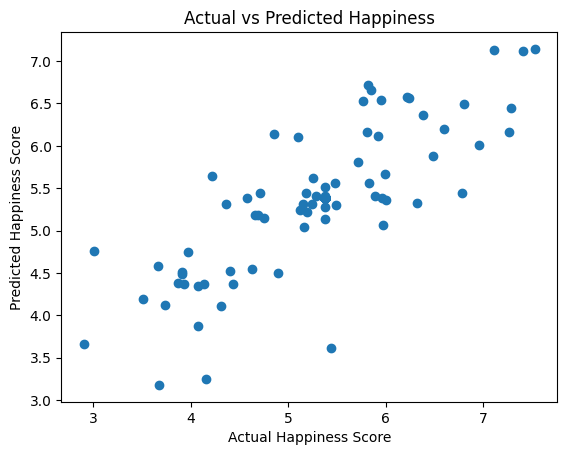

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness")
plt.show()

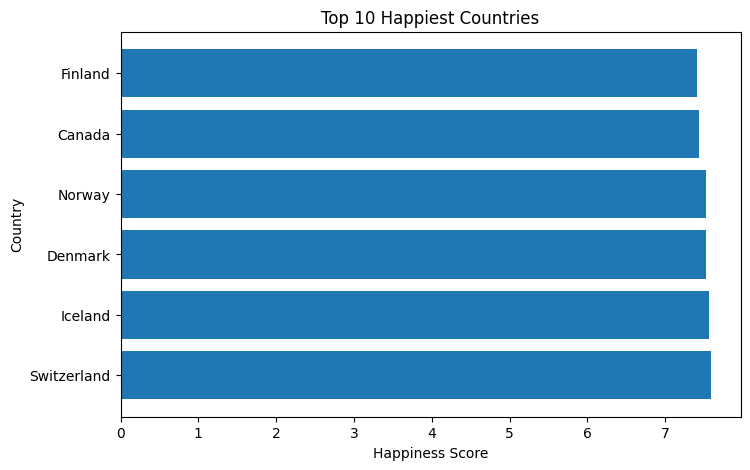

In [ ]:
top10 = data.sort_values(by='Happiness Score', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top10['Country'], top10['Happiness Score'])
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Top 10 Happiest Countries")
plt.show()

In [ ]:
top5 = data.sort_values(by='Happiness Score', ascending=False).head()
top5[['Country', 'Happiness Score']]

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
158,Denmark,7.526
3,Norway,7.522


In [ ]:

print("\nEnter values to predict Happiness Score:")

user_input = {}
for col in X.columns:
    value = float(input(f"Enter {col}: "))
    user_input[col] = value

user_df = pd.DataFrame([user_input])

predicted_score = model.predict(user_df)

print("\nPredicted Happiness Score:", predicted_score[0])


Enter values to predict Happiness Score:
Enter Economy (GDP per Capita): 1.39651
Enter Family: 1.34951
Enter Health (Life Expectancy): 0.94143

Predicted Happiness Score: 7.351999999999999
